In [60]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csvfile = pd.read_csv("Resources/directory.csv")

csvfile

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,Starbucks,21401-212072,Rex,Licensed,"141 Nguyễn Huệ, Quận 1, Góc đường Pasteur và L...",Thành Phố Hồ Chí Minh,SG,VN,70000,08 3824 4668,GMT+000000 Asia/Saigon,106.70,10.78
25596,Starbucks,24010-226985,Panorama,Licensed,"SN-44, Tòa Nhà Panorama, 208 Trần Văn Trà, Quận 7",Thành Phố Hồ Chí Minh,SG,VN,70000,08 5413 8292,GMT+000000 Asia/Saigon,106.71,10.72
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,"Cnr Tyrwhitt and Cradock Avenue, Rosebank",Johannesburg,GT,ZA,2194,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,"Shop 61B, Central Square, Cnr Aramist & Coroba...",Menlyn,GT,ZA,181,NaN,GMT+000000 Africa/Johannesburg,28.28,-25.79


In [61]:
csvfile.columns

Index(['Brand', 'Store Number', 'Store Name', 'Ownership Type',
       'Street Address', 'City', 'State/Province', 'Country', 'Postcode',
       'Phone Number', 'Timezone', 'Longitude', 'Latitude'],
      dtype='object')

In [62]:

cleaned_df = csvfile[{"Store Name","Ownership Type","Street Address","City","State/Province","Country","Postcode"}]
cleaned_df.head()

,Store Name,Street Address,Country,City,Ownership Type,Postcode,State/Province
0,"Meritxell, 96","Av. Meritxell, 96",AD,Andorra la Vella,Licensed,AD500,7
1,Ajman Drive Thru,"1 Street 69, Al Jarf",AE,Ajman,Licensed,NaN,AJ
2,Dana Mall,Sheikh Khalifa Bin Zayed St.,AE,Ajman,Licensed,NaN,AJ
3,Twofour 54,Al Salam Street,AE,Abu Dhabi,Licensed,NaN,AZ
4,Al Ain Tower,"Khaldiya Area, Abu Dhabi Island",AE,Abu Dhabi,Licensed,NaN,AZ


In [63]:
new_df = cleaned_df.loc[cleaned_df["Country"] == "US", :]
new_df

,Store Name,Street Address,Country,City,Ownership Type,Postcode,State/Province
11964,Safeway-Anchorage #1809,5600 Debarr Rd Ste 9,US,Anchorage,Licensed,995042300,AK
11965,Safeway-Anchorage #2628,1725 Abbott Rd,US,Anchorage,Licensed,995073444,AK
11966,Safeway - Anchorage #1813,1501 Huffman Rd,US,Anchorage,Licensed,995153596,AK
11967,100th & C St - Anchorage,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",US,Anchorage,Company Owned,99515,AK
11968,Old Seward & Diamond,1005 E Dimond Blvd,US,Anchorage,Company Owned,995152050,AK
...,...,...,...,...,...,...,...
25567,Safeway-Laramie #2466,554 N 3rd St,US,Laramie,Licensed,820723012,WY
25568,Ridley's - Laramie #1131,3112 E. Grand,US,Laramie,Licensed,820705141,WY
25569,Laramie - Grand & 30th,3021 Grand Ave,US,Laramie,Company Owned,82070,WY
25570,I-80 & Dewar Dr-Rock Springs,118 Westland Way,US,Rock Springs,Company Owned,829015751,WY


In [64]:
new_df['Zip_Code'] = new_df['Postcode'].where(new_df['Postcode'].str.len() == 5, 
                                               new_df['Postcode'].str[:5])

/Users/AnaLindaPenny/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
new_df

,Store Name,Street Address,Country,City,Ownership Type,Postcode,State/Province,Zip_Code
11964,Safeway-Anchorage #1809,5600 Debarr Rd Ste 9,US,Anchorage,Licensed,995042300,AK,99504
11965,Safeway-Anchorage #2628,1725 Abbott Rd,US,Anchorage,Licensed,995073444,AK,99507
11966,Safeway - Anchorage #1813,1501 Huffman Rd,US,Anchorage,Licensed,995153596,AK,99515
11967,100th & C St - Anchorage,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",US,Anchorage,Company Owned,99515,AK,99515
11968,Old Seward & Diamond,1005 E Dimond Blvd,US,Anchorage,Company Owned,995152050,AK,99515
...,...,...,...,...,...,...,...,...
25567,Safeway-Laramie #2466,554 N 3rd St,US,Laramie,Licensed,820723012,WY,82072
25568,Ridley's - Laramie #1131,3112 E. Grand,US,Laramie,Licensed,820705141,WY,82070
25569,Laramie - Grand & 30th,3021 Grand Ave,US,Laramie,Company Owned,82070,WY,82070
25570,I-80 & Dewar Dr-Rock Springs,118 Westland Way,US,Rock Springs,Company Owned,829015751,WY,82901


In [66]:
sb_df = new_df[{"Store Name","Ownership Type","Street Address","City","State/Province","Country","Zip_Code"}]

In [67]:
sb_df

,Store Name,Street Address,Country,City,Ownership Type,Zip_Code,State/Province
11964,Safeway-Anchorage #1809,5600 Debarr Rd Ste 9,US,Anchorage,Licensed,99504,AK
11965,Safeway-Anchorage #2628,1725 Abbott Rd,US,Anchorage,Licensed,99507,AK
11966,Safeway - Anchorage #1813,1501 Huffman Rd,US,Anchorage,Licensed,99515,AK
11967,100th & C St - Anchorage,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",US,Anchorage,Company Owned,99515,AK
11968,Old Seward & Diamond,1005 E Dimond Blvd,US,Anchorage,Company Owned,99515,AK
...,...,...,...,...,...,...,...
25567,Safeway-Laramie #2466,554 N 3rd St,US,Laramie,Licensed,82072,WY
25568,Ridley's - Laramie #1131,3112 E. Grand,US,Laramie,Licensed,82070,WY
25569,Laramie - Grand & 30th,3021 Grand Ave,US,Laramie,Company Owned,82070,WY
25570,I-80 & Dewar Dr-Rock Springs,118 Westland Way,US,Rock Springs,Company Owned,82901,WY


In [68]:
nc_sb_df = sb_df.loc[sb_df["State/Province"] == "NC", :]
nc_sb_df.head()

,Store Name,Street Address,Country,City,Ownership Type,Zip_Code,State/Province
19830,"Aberdeen, NC",110 Columbus Drive,US,Aberdeen,Company Owned,28315,NC
19831,Harris Teeter-Apex #58,750 W Williams St,US,Apex,Licensed,27502,NC
19832,Kroger-Apex #357,940 US Hwy 64,US,Apex,Licensed,27523,NC
19833,Super Target Apex ST-1932,1201 Beaver Creek Commons Dr,US,Apex,Licensed,27502,NC
19834,Target Asheville T-2011,15 McKenna Rd,US,Arden,Licensed,28704,NC


In [69]:
nc_sb_df

,Store Name,Street Address,Country,City,Ownership Type,Zip_Code,State/Province
19830,"Aberdeen, NC",110 Columbus Drive,US,Aberdeen,Company Owned,28315,NC
19831,Harris Teeter-Apex #58,750 W Williams St,US,Apex,Licensed,27502,NC
19832,Kroger-Apex #357,940 US Hwy 64,US,Apex,Licensed,27523,NC
19833,Super Target Apex ST-1932,1201 Beaver Creek Commons Dr,US,Apex,Licensed,27502,NC
19834,Target Asheville T-2011,15 McKenna Rd,US,Arden,Licensed,28704,NC
...,...,...,...,...,...,...,...
20163,Hanes Mall Blvd.,2015 Frontis Plaza Boulevard,US,Winston-Salem,Company Owned,27103,NC
20164,Stratford Road,"110 Oakwood Drive, Space U122, N/A",US,Winston-Salem,Company Owned,27103,NC
20165,Reynolda Road,2898 Reynolda Road,US,Winston-Salem,Company Owned,27106,NC
20166,Wake Forest University Z. Smith Rey,1834 Wake Forest Rd,US,Winston-Salem,Licensed,27109,NC


In [70]:
nc_zipcodes = pd.read_csv("nczipcodes.csv")
nc_zipcodes

,Zip_Code,City,State,County Name
0,28315,ABERDEEN,NC,MOORE
1,27006,ADVANCE,NC,DAVIE
2,27910,AHOSKIE,NC,HERTFORD
3,27201,ALAMANCE,NC,ALAMANCE
4,28001,ALBEMARLE,NC,STANLY
...,...,...,...,...
1041,27379,YANCEYVILLE,NC,CASWELL
1042,27596,YOUNGSVILLE,NC,FRANKLIN
1043,27597,ZEBULON,NC,WAKE
1044,28698,ZIONVILLE,NC,WATAUGA


In [71]:
nc_zipcodes.dtypes

Zip_Code        int64
City           object
State          object
County Name    object
dtype: object

In [72]:
nc_zipcodes['Zip_Code'] = nc_zipcodes['Zip_Code'].apply(str)

In [73]:
merge_df = pd.merge(nc_sb_df, nc_zipcodes, on="Zip_Code", how="inner")
merge_df

,Store Name,Street Address,Country,City_x,Ownership Type,Zip_Code,State/Province,City_y,State,County Name
0,"Aberdeen, NC",110 Columbus Drive,US,Aberdeen,Company Owned,28315,NC,ABERDEEN,NC,MOORE
1,Harris Teeter-Apex #58,750 W Williams St,US,Apex,Licensed,27502,NC,APEX,NC,WAKE
2,Super Target Apex ST-1932,1201 Beaver Creek Commons Dr,US,Apex,Licensed,27502,NC,APEX,NC,WAKE
3,Kroger-Apex #357,940 US Hwy 64,US,Apex,Licensed,27523,NC,APEX,NC,WAKE
4,Target Asheville T-2011,15 McKenna Rd,US,Arden,Licensed,28704,NC,ARDEN,NC,BUNCOMBE
...,...,...,...,...,...,...,...,...,...,...
333,Target Winston-Salem North T-1077,5420 University Pkwy,US,Winston-Salem,Licensed,27105,NC,WINSTON SALEM,NC,FORSYTH
334,Harris Teeter Winston Salem # 346,2835 Reynolda Rd,US,Winston-Salem,Licensed,27106,NC,WINSTON SALEM,NC,FORSYTH
335,Mt. Tabor Place,3327 Robinhood Road,US,Winston-Salem,Company Owned,27106,NC,WINSTON SALEM,NC,FORSYTH
336,Reynolda Road,2898 Reynolda Road,US,Winston-Salem,Company Owned,27106,NC,WINSTON SALEM,NC,FORSYTH


In [74]:
new_nc_sb_df = merge_df[{"Country","Store Name","Ownership Type",
                         "Street Address","City_y","State","Country","Zip_Code","County Name"}]
new_nc_sb_df

,County Name,Store Name,Country,Street Address,City_y,Ownership Type,Zip_Code,State
0,MOORE,"Aberdeen, NC",US,110 Columbus Drive,ABERDEEN,Company Owned,28315,NC
1,WAKE,Harris Teeter-Apex #58,US,750 W Williams St,APEX,Licensed,27502,NC
2,WAKE,Super Target Apex ST-1932,US,1201 Beaver Creek Commons Dr,APEX,Licensed,27502,NC
3,WAKE,Kroger-Apex #357,US,940 US Hwy 64,APEX,Licensed,27523,NC
4,BUNCOMBE,Target Asheville T-2011,US,15 McKenna Rd,ARDEN,Licensed,28704,NC
...,...,...,...,...,...,...,...,...
333,FORSYTH,Target Winston-Salem North T-1077,US,5420 University Pkwy,WINSTON SALEM,Licensed,27105,NC
334,FORSYTH,Harris Teeter Winston Salem # 346,US,2835 Reynolda Rd,WINSTON SALEM,Licensed,27106,NC
335,FORSYTH,Mt. Tabor Place,US,3327 Robinhood Road,WINSTON SALEM,Company Owned,27106,NC
336,FORSYTH,Reynolda Road,US,2898 Reynolda Road,WINSTON SALEM,Company Owned,27106,NC


In [75]:
sb_owner_counts = new_nc_sb_df["Ownership Type"].value_counts()
sb_owner_counts.head()

Licensed         186
Company Owned    152
Name: Ownership Type, dtype: int64

In [76]:
sb_zip_counts = new_nc_sb_df["Zip_Code"].value_counts()
sb_zip_counts

28277    10
28208    10
27103     8
27410     8
27560     7
         ..
28655     1
27613     1
28144     1
27406     1
28712     1
Name: Zip_Code, Length: 152, dtype: int64

In [77]:
sb_city_counts = new_nc_sb_df["City_y"].value_counts()
sb_city_counts

CHARLOTTE     61
RALEIGH       27
GREENSBORO    19
CARY          17
DURHAM        15
              ..
KITTY HAWK     1
LUMBERTON      1
LINCOLNTON     1
BURNSVILLE     1
SALISBURY      1
Name: City_y, Length: 86, dtype: int64

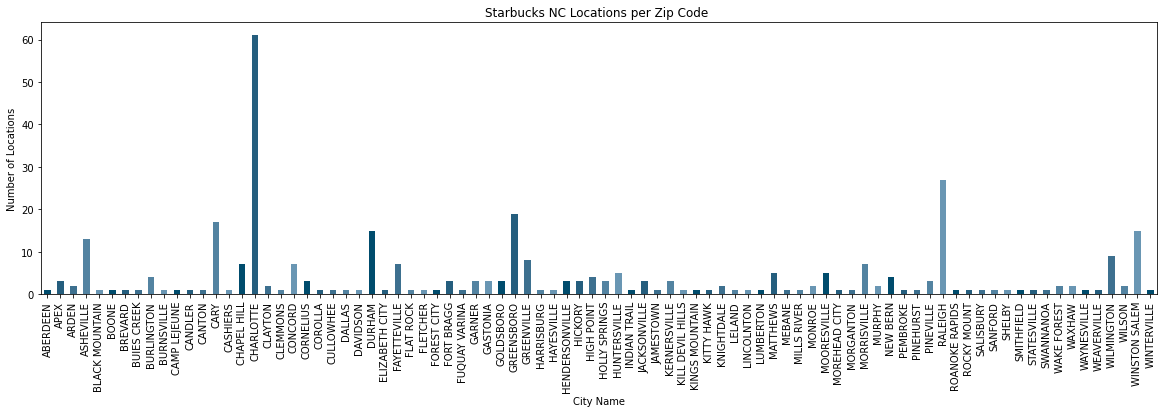

In [80]:
# Generate a bar plot showing the total number of Starbucks locations per Zip_Code using pandas
locations_per_City_y_data_points = new_nc_sb_df.groupby(['City_y']).count()['Zip_Code']
colors = ['#004c6d', '#255e7e', '#3d708f', '#5383a1', '#6996b3']

locations_per_City_y_data_points.plot(kind='bar', figsize=(20,5), color=colors)

plt.title('Starbucks NC Locations per Zip Code ')
plt.xlabel('City Name')
plt.ylabel('Number of Locations')

plt.show()